In [49]:
import pandas as pd
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt  
sns.set(color_codes=True) 
%matplotlib inline

In [125]:
df=pd.read_csv('C:\\Users\\Ritik Dhingra\\Downloads\\Laliga_scores.csv',header=[1])

In [126]:
df.replace(to_replace='-',value=0,inplace=True)

ques 1)a)

In [171]:
df.columns

Index(['Pos', 'Team', 'Seasons', 'Points', 'GamesPlayed', 'GamesWon',
       'GamesDrawn', 'GamesLost', 'GoalsFor', 'GoalsAgainst', 'Champion',
       'Runner-up', 'Third', 'Fourth', 'Fifth', 'Sixth', 'Debut',
       'BestPosition', 'Goal_diff_count', 'Winning Percent'],
      dtype='object')

In [172]:
df['BestPosition']

0      1
1      1
2      1
3      1
4      1
      ..
56    20
57    16
58    16
59    15
60     9
Name: BestPosition, Length: 61, dtype: int64

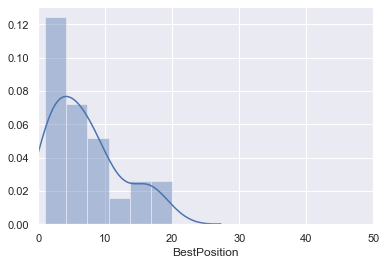

In [173]:
plt.xlim(0, 50)
sns.distplot(df['BestPosition']);

In [174]:
bin_list=[i for i in range(0,25)]

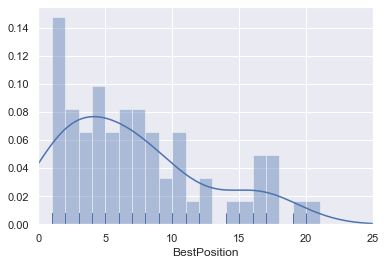

In [175]:
plt.xlim(0, 25)
sns.distplot(df['BestPosition'],bins=bin_list,rug=True);

ques1)b) Best position is  1 with maximum occurence.

In [176]:
for i in range(0,len(df)):
    if(type(df['Debut'].iloc[i])==str):
        df['Debut'].iloc[i]=df['Debut'].iloc[i][0:4]
    

In [177]:
df['Debut']

0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: Debut, Length: 61, dtype: int32

In [135]:
df['Debut']=df['Debut'].astype(int)

In [136]:
debut_team=df[(df['Debut']>=1930) & (df['Debut']<1980)]

In [137]:
debut_team.describe()

,Pos,Seasons,Debut,BestPosition
count,37.000000,37.000000,37.000000,37.000000
mean,29.837838,22.810811,1951.000000,6.675676
std,16.225004,21.202513,14.632536,4.601051
min,4.000000,1.000000,1930.000000,1.000000
25%,17.000000,6.000000,1940.000000,4.000000
50%,28.000000,14.000000,1949.000000,5.000000
75%,41.000000,37.000000,1961.000000,10.000000
max,60.000000,82.000000,1979.000000,16.000000


In [138]:
len(debut_team)

37

ques 2)

37 teams made their debut in that time


In [139]:
print(debut_team['Team'])

3                Valencia
5                 Sevilla
8                Zaragoza
9              Real Betis
10    Deportivo La Coruna
11             Celta Vigo
12             Valladolid
14         Sporting Gijon
15                Osasuna
16                 Malaga
17                 Oviedo
18               Mallorca
19             Las Palmas
21                Granada
22         Rayo Vallecano
23                  Elche
25               Hercules
26               Tenerife
27                 Murcia
28                 Alaves
29                Levante
30              Salamanca
31               Sabadell
32                  Cadiz
34              Castellon
37                Cordoba
39             Recreativo
40              Burgos CF
41             Pontevedra
46              Gimnastic
49               Alcoyano
50                   Jaen
52             AD Almeria
54                 Lleida
57                 Condal
58        Atletico Tetuan
59       Cultural Leonesa
Name: Team, dtype: object


In [179]:
df['Points']=df['Points'].astype(int)
df.sort_values(by='Points',ascending=False,inplace=True)

ques 3)

In [180]:
print(df.head(5))

   Pos             Team  Seasons  Points  GamesPlayed  GamesWon GamesDrawn  \
0    1      Real Madrid       86    4385         2762      1647        552   
1    2        Barcelona       86    4262         2762      1581        573   
2    3  Atletico Madrid       80    3442         2614      1241        598   
3    4         Valencia       82    3386         2664      1187        616   
4    5  Athletic Bilbao       86    3368         2762      1209        633   

  GamesLost  GoalsFor  GoalsAgainst Champion Runner-up Third Fourth Fifth  \
0       563      5947          3140       33        23     8      8     3   
1       608      5900          3114       25        25    12     12     4   
2       775      4534          3309       10         8    16      9     7   
3       861      4398          3469        6         6    10     11    10   
4       920      4631          3700        8         7    10      5     8   

  Sixth  Debut  BestPosition  Goal_diff_count  Winning Percent  
0  

Top 5 teams in terms of goal scored


ques 4)

In [181]:
def goal_diff_count(df):
    df['GoalsFor']=df['GoalsFor'].astype(int)
    df['GoalsAgainst']=df['GoalsAgainst'].astype(int)
    df['Goal_diff_count']=df['GoalsFor']-df['GoalsAgainst']
    pf=df[['Team','Goal_diff_count']]
    pf.sort_values(by='Goal_diff_count',ascending=False,inplace=True)
    max_team=pf.iloc[0]['Team']
    min_team=pf.iloc[-1]['Team']
    return pf,max_team,min_team
    

In [182]:
goal_diff,max_goal_diff,min_goal_diff=goal_diff_count(df)

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Teams with goal differences


In [183]:
print(goal_diff)

                Team  Goal_diff_count
0        Real Madrid             2807
1          Barcelona             2786
2    Atletico Madrid             1225
4    Athletic Bilbao              931
3           Valencia              929
..               ...              ...
27            Murcia             -385
19        Las Palmas             -399
14    Sporting Gijon             -399
12        Valladolid             -413
13  Racing Santander             -525

[61 rows x 2 columns]


ques 5)

In [184]:
print(max_goal_diff)

Real Madrid


In [185]:
print(min_goal_diff)

Racing Santander


Team with max goal difference is Real Madrid and minimum goal difference is Racing Santander

In [186]:
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Goal_diff_count,Winning Percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1,2807,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1,2786,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1,1225,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931,1,929,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1,931,43.772629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,2009,20,-28,21.052632
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,1956,16,-20,23.333333
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,1951,16,-34,23.333333
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,1955,15,-31,16.666667


ques 6)

In [187]:
df['GamesWon']=df['GamesWon'].astype(int)
df['GamesPlayed']=df['GamesPlayed'].astype(int)



In [188]:
df['Winning Percent']=(df['GamesWon']/df['GamesPlayed'])*100

In [189]:
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Goal_diff_count,Winning Percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1,2807,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1,2786,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1,1225,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931,1,929,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1,931,43.772629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,2009,20,-28,21.052632
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,1956,16,-20,23.333333
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,1951,16,-34,23.333333
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,1955,15,-31,16.666667


In [190]:
df['Winning Percent']=df['Winning Percent'].fillna(0)

In [191]:
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,Debut,BestPosition,Goal_diff_count,Winning Percent
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,1929,1,2807,59.630702
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,1929,1,2786,57.241130
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,1929,1,1225,47.475134
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,1931,1,929,44.557057
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,1929,1,931,43.772629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Xerez,1,34,38,8,10,20,38,66,0,0,0,0,0,0,2009,20,-28,21.052632
57,58,Condal,1,22,30,7,8,15,37,57,0,0,0,0,0,0,1956,16,-20,23.333333
58,59,Atletico Tetuan,1,19,30,7,5,18,51,85,0,0,0,0,0,0,1951,16,-34,23.333333
59,60,Cultural Leonesa,1,14,30,5,4,21,34,65,0,0,0,0,0,0,1955,15,-31,16.666667


ques 7)

In [192]:

print(df.sort_values(by='Winning Percent',ascending=False).head(5)['Team'])

0        Real Madrid
1          Barcelona
2    Atletico Madrid
3           Valencia
4    Athletic Bilbao
Name: Team, dtype: object


Top 5 teams are as follows:
    Real Madrid,
          Barcelona,
    Atletico Madrid,
           Valencia,
    Athletic Bilbao


ques 8)

In [169]:
gpdata=df.groupby(by=['BestPosition']).sum()['Points']

In [170]:
print(gpdata)

BestPosition
1     27933
2      6904
3      5221
4      6563
5      1884
6      2113
7      1186
8      1134
9        96
10      450
11      445
12      511
14       71
15       14
16       81
17      266
19       81
20       34
Name: Points, dtype: int32


Sum of points for all positions.